# **Complex Networks Project - Analysis of LastFM Asia Social Network**

PS : The project should be run on Google Colab, importing locally the file "lastfm_asia_edges.csv".

In [1]:
# To use graph-tool library

!echo "deb http://downloads.skewed.de/apt focal main" >> /etc/apt/sources.list
!apt-key adv --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool python3-matplotlib python3-cairo

Executing: /tmp/apt-key-gpghome.nPcgLMn9Cv/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
gpg: key 612DEFB798507F25: public key "Tiago de Paula Peixoto <tiago@skewed.de>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Get:4 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:6 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:7 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,779 kB]
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:9 http://downloads.skewed.de/apt focal InRelease [7,536 B]
Get:10 https://developer.download.nvidia.com/comp

In [2]:
!apt purge python3-cairo
!apt install libcairo2-dev pkg-config python3-dev
!pip install --force-reinstall pycairo
!pip install zstandard

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages will be REMOVED:
  python3-cairo*
0 upgraded, 0 newly installed, 1 to remove and 46 not upgraded.
After this operation, 270 kB disk space will be freed.
(Reading database ... 126032 files and directories currently installed.)
Removing python3-cairo:amd64 (1.16.2-2ubuntu2) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu4).
python3-dev is already the newest version (3.8.2-0ubuntu2).
python3-dev set to manually installed.
The following additional packages will be installed:
  libblkid-dev libblkid1 libcairo-script-interpreter2 libffi-dev
  libglib2.0-dev libglib2.0-dev-bin liblzo2-2 libmount-dev libmount1
  libpixman-1-dev libselinux1-dev libsepol1-dev libxcb-render0-dev
  libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc lib

In [3]:
# Install Louvain library and epidemic module

!pip install python-louvain
!pip install EoN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.2/113.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for EoN: filename=EoN-1.1-py3-none-any.whl size=120793 sha256=e5f1d5a0f1449c5245d9890d890a9cf7bea54a7c88867f175a735a94eee85f32
  Stored in directory: /root/.cache/pip/wheels/cc/38/06/01956d0db50e69cbcd6752d4b362685690c4fc17a80674bf18
Successfully built EoN


In [4]:
# We import the required librairies and modules

from collections import Counter
import graph_tool.all as gt
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import EoN

/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:1544: RuntimeWarning: Error importing Gtk module: cannot import name '_gi' from partially initialized module 'gi' (most likely due to a circular import) (/usr/lib/python3/dist-packages/gi/__init__.py); GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)


In [5]:
# We read the dataset (after extracting the zip file)

edges = pd.read_csv("lastfm_asia_edges.csv")
print(edges.shape)
edges.head()

(27806, 2)


node_1  node_2
0       0     747
1       1    4257
2       1    2194
3       1     580
4       1    6478

# **I - Network metrics**

In [27]:
### We create an undirected graph
G = nx.from_pandas_edgelist(edges, source="node_1", target="node_2")

### Number of nodes and edges
print(f"Number of nodes : {G.number_of_nodes()}, number of edges : {G.number_of_edges()}")

### Density
print(f"The graph density is {nx.density(G)}")

### Degree for each node
degrees = {n: G.degree(n) for n in G.nodes()}
print(f"Node: Degree")
degrees

Number of nodes : 7624, number of edges : 27806
The graph density is 0.0009568849118596328
Node: Degree


{0: 1,
 747: 8,
 1: 10,
 4257: 27,
 2194: 23,
 580: 1,
 6478: 22,
 1222: 15,
 5735: 8,
 7146: 4,
 2204: 25,
 126: 6,
 2639: 11,
 2: 7,
 562: 5,
 1492: 8,
 6: 20,
 5303: 16,
 7128: 10,
 4154: 9,
 5179: 2,
 3: 18,
 1728: 11,
 4560: 13,
 5060: 22,
 1351: 7,
 6503: 11,
 7089: 22,
 4319: 33,
 6095: 19,
 272: 4,
 4433: 26,
 2900: 3,
 3381: 38,
 5943: 6,
 2107: 11,
 6940: 12,
 2013: 11,
 6046: 17,
 5823: 26,
 4: 1,
 5770: 5,
 5: 1,
 5454: 72,
 5856: 10,
 667: 35,
 6180: 19,
 598: 11,
 870: 8,
 3079: 11,
 1834: 19,
 6283: 7,
 7340: 10,
 7279: 12,
 342: 8,
 4405: 1,
 1462: 20,
 1284: 11,
 1551: 10,
 3291: 5,
 167: 20,
 7: 8,
 177: 7,
 6243: 1,
 7589: 4,
 2854: 119,
 6931: 13,
 6250: 6,
 428: 1,
 2142: 18,
 8: 1,
 1686: 3,
 9: 8,
 4481: 1,
 1795: 50,
 2660: 3,
 6053: 1,
 246: 3,
 3843: 3,
 6441: 14,
 366: 3,
 10: 1,
 5489: 6,
 11: 5,
 5240: 6,
 618: 7,
 2412: 10,
 1325: 12,
 4919: 20,
 12: 2,
 5274: 102,
 3807: 23,
 13: 29,
 1794: 17,
 3971: 8,
 1223: 33,
 6152: 5,
 5385: 1,
 1509: 54,
 524: 172

In [7]:
# Number of nodes (values of the dict) per degree (key of the dict)

degree_distrib = dict(Counter(sorted(degrees.values())))
degree_distrib

{1: 1754,
 2: 1188,
 3: 791,
 4: 619,
 5: 464,
 6: 385,
 7: 318,
 8: 270,
 9: 193,
 10: 203,
 11: 158,
 12: 123,
 13: 122,
 14: 104,
 15: 92,
 16: 81,
 17: 65,
 18: 47,
 19: 46,
 20: 42,
 21: 33,
 22: 46,
 23: 37,
 24: 30,
 25: 38,
 26: 24,
 27: 25,
 28: 16,
 29: 17,
 30: 22,
 31: 7,
 32: 17,
 33: 20,
 34: 12,
 35: 12,
 36: 16,
 37: 10,
 38: 11,
 39: 13,
 40: 3,
 41: 5,
 42: 7,
 43: 5,
 44: 11,
 45: 5,
 46: 5,
 47: 3,
 48: 5,
 50: 4,
 51: 5,
 52: 7,
 53: 6,
 54: 4,
 55: 1,
 56: 3,
 57: 4,
 58: 1,
 59: 3,
 60: 6,
 61: 2,
 62: 3,
 63: 3,
 64: 1,
 65: 1,
 66: 2,
 67: 1,
 69: 3,
 71: 3,
 72: 2,
 73: 1,
 74: 1,
 75: 1,
 76: 3,
 77: 1,
 78: 1,
 79: 1,
 80: 2,
 81: 3,
 84: 2,
 87: 1,
 89: 1,
 90: 1,
 94: 1,
 98: 1,
 100: 2,
 102: 2,
 104: 1,
 106: 1,
 108: 1,
 113: 1,
 119: 3,
 124: 1,
 140: 1,
 159: 1,
 172: 1,
 174: 1,
 175: 1,
 216: 1}

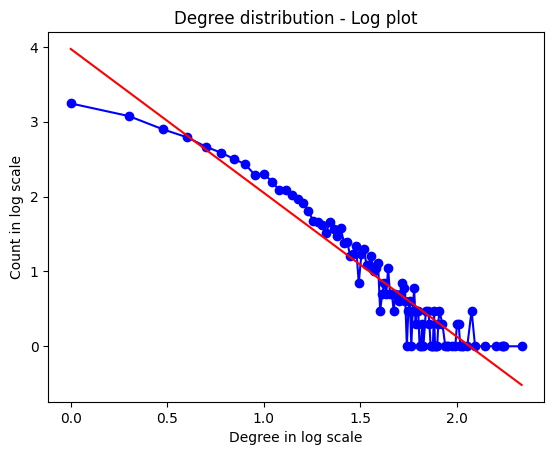

(-1.9223698243519434, 3.971596206197904)

In [8]:
### Degree distribution -> analysis of a scale-free property

log_deg_l = np.log10(list(degree_distrib.keys()))
log_deg_s = np.log10(list(degree_distrib.values()))
plt.plot(log_deg_l, log_deg_s, 'b-o') # We adjust the size of the bins
m, c = np.polyfit(log_deg_l, log_deg_s, 1)
y_fit = m*log_deg_l + c
plt.plot(log_deg_l, y_fit, 'r-')

plt.xlabel("Degree in log scale")
plt.ylabel("Count in log scale")
plt.title("Degree distribution - Log plot")
plt.show()
m, c

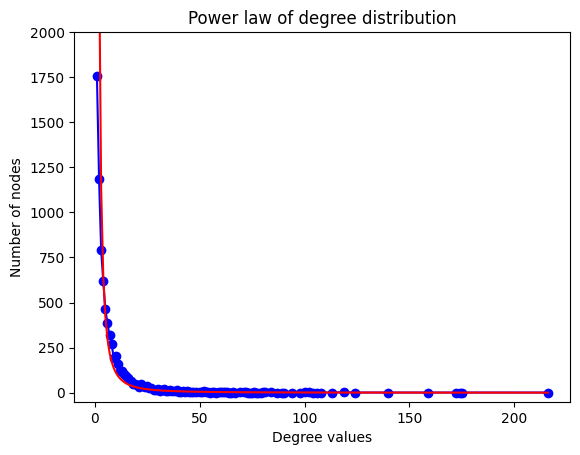

In [29]:
plt.plot(degree_distrib.keys(), degree_distrib.values(), 'b-o')
plt.plot(degree_distrib.keys(), 10 ** y_fit, 'r-')
plt.ylim([-50,2000])
plt.xlabel("Degree values")
plt.ylabel("Number of nodes")
plt.title("Power law of degree distribution")
plt.show()

In [10]:
### Connected components

print(f"Number of connected components : {nx.number_connected_components(G)}")
nx.is_connected(G)

Number of connected components : 1


True

In [11]:
### Average degree of the graph

print(f"The average degree of a node in the graph is {np.mean([G.degree(n) for n in G.nodes()])}.")

The average degree of a node in the graph is 7.2943336831059815.


In [12]:
### Measure of centrality : Closeness

closeness_list = nx.closeness_centrality(G)

print(f"The average closeness of a node is {np.mean(list(closeness_list.values()))}")
print(f"Minimum closeness : {min(list(closeness_list.values()))}, Maximum closeness : {max(list(closeness_list.values()))}")
print(f"Closeness for each node :")
closeness_list

The average closeness of a node is 0.1943856661354511
Minimum closeness : 0.10041626050530864, Maximum closeness : 0.29071009076348103
Closeness for each node :


{0: 0.17692932575142162,
 747: 0.21495643346586582,
 1: 0.210620838283646,
 4257: 0.21952483801295897,
 2194: 0.21324866422357122,
 580: 0.17398151318041766,
 6478: 0.23713681328936725,
 1222: 0.21233983286908079,
 5735: 0.20339390058432721,
 7146: 0.19786637595390127,
 2204: 0.21904542972903077,
 126: 0.19452383382668165,
 2639: 0.20341018251681076,
 2: 0.1690881263447419,
 562: 0.17443536761172512,
 1492: 0.1716775893520708,
 6: 0.1959237174874062,
 5303: 0.18364691994507215,
 7128: 0.19214579184836034,
 4154: 0.17875902823374917,
 5179: 0.16756424065240808,
 3: 0.21736526946107784,
 1728: 0.2030039146760406,
 4560: 0.22419928825622776,
 5060: 0.2331977117684848,
 1351: 0.21683354192740925,
 6503: 0.2206112172252127,
 7089: 0.2358966424261179,
 4319: 0.24526237894533637,
 6095: 0.23333333333333334,
 272: 0.1823073611708997,
 4433: 0.22606091159811392,
 2900: 0.1929775707559111,
 3381: 0.2505999539761333,
 5943: 0.2211552409411355,
 2107: 0.21064993920636677,
 6940: 0.2246750567361254

In [13]:
### Longest shortest path for each node

long_short_path_list = {}
for n in G.nodes():
    # For every node, we compute the shortest paths lengths, and we get the maximum
    paths = nx.single_source_shortest_path_length(G, n)
    long_short_path_list[n] = max(paths.values())

long_short_path_list

{0: 11,
 747: 10,
 1: 9,
 4257: 10,
 2194: 9,
 580: 10,
 6478: 9,
 1222: 9,
 5735: 10,
 7146: 10,
 2204: 9,
 126: 10,
 2639: 10,
 2: 11,
 562: 11,
 1492: 12,
 6: 11,
 5303: 11,
 7128: 11,
 4154: 11,
 5179: 11,
 3: 10,
 1728: 10,
 4560: 10,
 5060: 10,
 1351: 10,
 6503: 10,
 7089: 9,
 4319: 10,
 6095: 10,
 272: 11,
 4433: 10,
 2900: 11,
 3381: 10,
 5943: 10,
 2107: 10,
 6940: 10,
 2013: 11,
 6046: 10,
 5823: 10,
 4: 12,
 5770: 11,
 5: 9,
 5454: 8,
 5856: 11,
 667: 11,
 6180: 11,
 598: 11,
 870: 11,
 3079: 11,
 1834: 10,
 6283: 12,
 7340: 11,
 7279: 11,
 342: 12,
 4405: 12,
 1462: 10,
 1284: 11,
 1551: 12,
 3291: 11,
 167: 10,
 7: 10,
 177: 10,
 6243: 11,
 7589: 9,
 2854: 9,
 6931: 10,
 6250: 11,
 428: 11,
 2142: 10,
 8: 11,
 1686: 10,
 9: 10,
 4481: 11,
 1795: 9,
 2660: 11,
 6053: 11,
 246: 10,
 3843: 10,
 6441: 9,
 366: 10,
 10: 10,
 5489: 9,
 11: 11,
 5240: 11,
 618: 11,
 2412: 10,
 1325: 10,
 4919: 10,
 12: 10,
 5274: 9,
 3807: 10,
 13: 10,
 1794: 10,
 3971: 10,
 1223: 10,
 6152: 10,


In [14]:
## Diameter

print(f"The diameter of G is {nx.diameter(G)}.")

avg_long_short_path = np.mean(list(long_short_path_list.values()))
print(f"The average longest shortest path is {avg_long_short_path}")

The diameter of G is 15.
The average longest shortest path is 10.457240293809024


In [28]:
### Clustering coefficient

clustering_coefs = {}
for n in G.nodes():
    clustering_coefs[n] = nx.clustering(G,n)

print(f"The average clustering coefficient of the graph is {nx.average_clustering(G)}")
clustering_coefs

The average clustering coefficient of the graph is 0.2194184243270858


{0: 0,
 747: 0.25,
 1: 0.022222222222222223,
 4257: 0.045584045584045586,
 2194: 0.22529644268774704,
 580: 0,
 6478: 0.06926406926406926,
 1222: 0.047619047619047616,
 5735: 0,
 7146: 0.16666666666666666,
 2204: 0.2,
 126: 0,
 2639: 0.01818181818181818,
 2: 0.19047619047619047,
 562: 0.1,
 1492: 0.5357142857142857,
 6: 0.18947368421052632,
 5303: 0.10833333333333334,
 7128: 0.28888888888888886,
 4154: 0.027777777777777776,
 5179: 0,
 3: 0.24183006535947713,
 1728: 0.3090909090909091,
 4560: 0.15384615384615385,
 5060: 0.05194805194805195,
 1351: 0.47619047619047616,
 6503: 0.5272727272727272,
 7089: 0.1341991341991342,
 4319: 0.09848484848484848,
 6095: 0.14619883040935672,
 272: 0,
 4433: 0.16615384615384615,
 2900: 0,
 3381: 0.18776671408250356,
 5943: 0.06666666666666667,
 2107: 0.38181818181818183,
 6940: 0.30303030303030304,
 2013: 0.18181818181818182,
 6046: 0.3382352941176471,
 5823: 0.14461538461538462,
 4: 0,
 5770: 0.5,
 5: 0,
 5454: 0.02543035993740219,
 5856: 0.08888888888

In [16]:
# Small world property

print(f"The average path length is {nx.average_shortest_path_length(G)}")
print(f"And the logarithm of the number of nodes is {np.log2(G.number_of_nodes())}")

The average path length is 5.232237268915701
And the logarithm of the number of nodes is 12.896332403909941


# **II - Community detection on the social network**

In [17]:
from community import community_louvain
import matplotlib.cm as cm

partition = community_louvain.best_partition(G)  # Find communities with the Louvain algorithm
nb_partitions = len(np.unique(list(partition.values())))
print(nb_partitions)
nx.community.modularity(G, nx.community.louvain_communities(G))

28


0.8161991900872316

<ipython-input-18-ae547571c950>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv', max(partition.values()) + 1)
<ipython-input-18-ae547571c950>:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


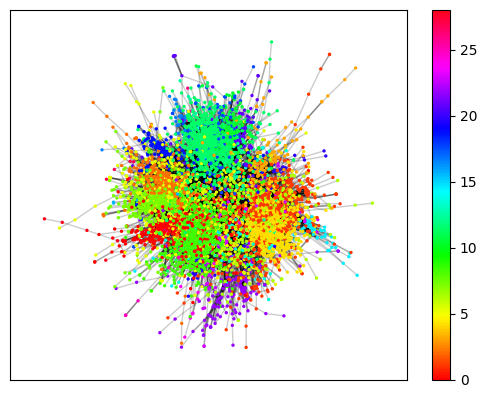

In [18]:
pos = nx.spring_layout(G)
cmap = cm.get_cmap('hsv', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=2,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.2)

# Add a colorbar to show community colors
sm = plt.cm.ScalarMappable(cmap='hsv', norm=plt.Normalize(vmin=0, vmax=nb_partitions))
sm.set_array([])
plt.colorbar(sm)
plt.show()

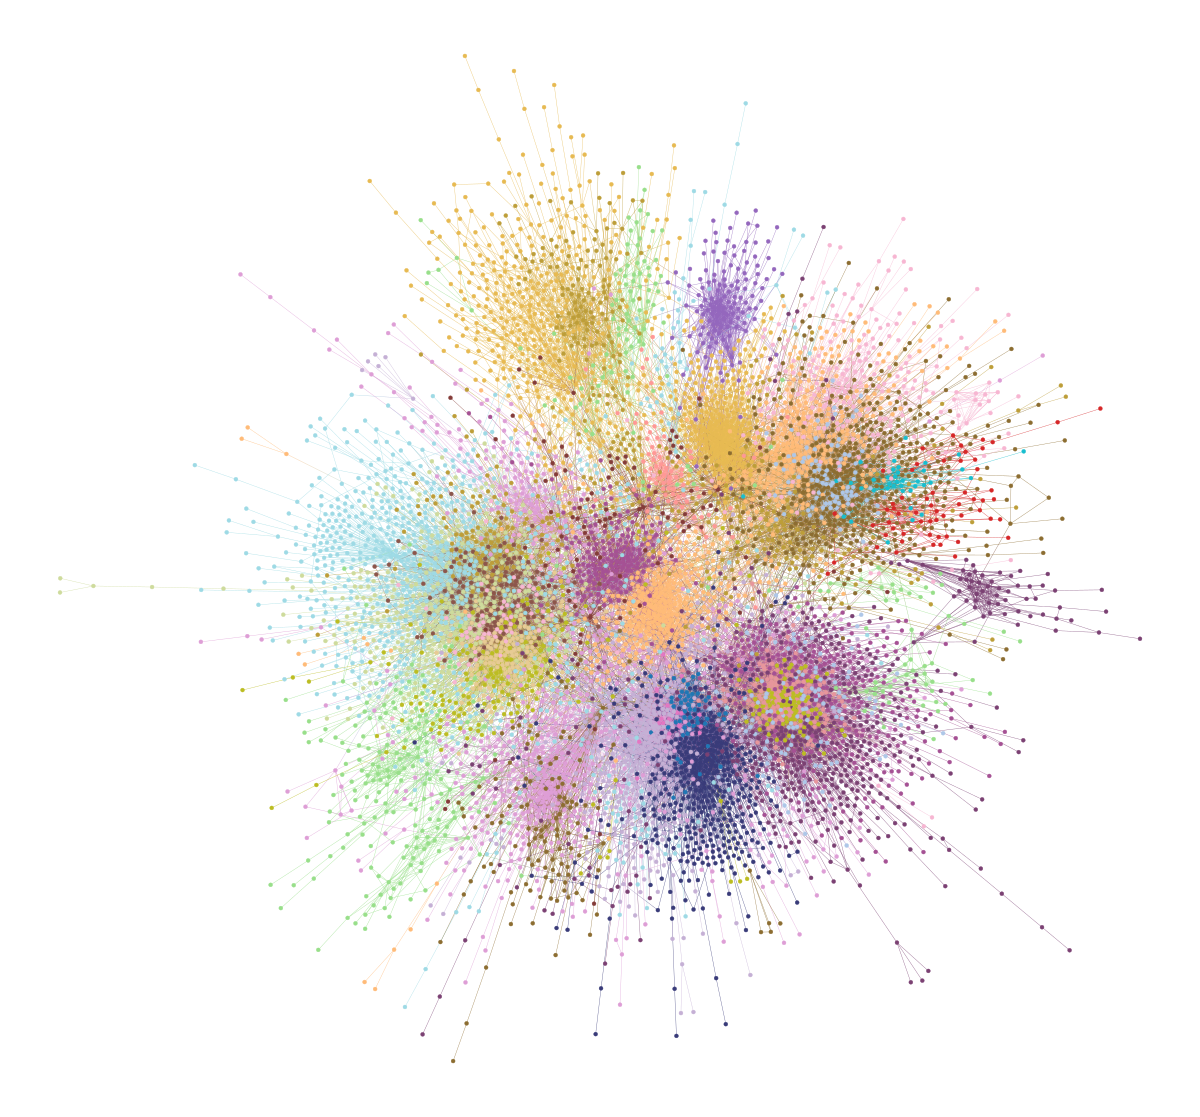

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f7e99819120, at 0x7f7e983b4460>

In [19]:
G_gt = gt.Graph(directed=False)
G_gt.add_edge_list(np.array(edges))
state = gt.minimize_blockmodel_dl(G_gt)
state.draw()

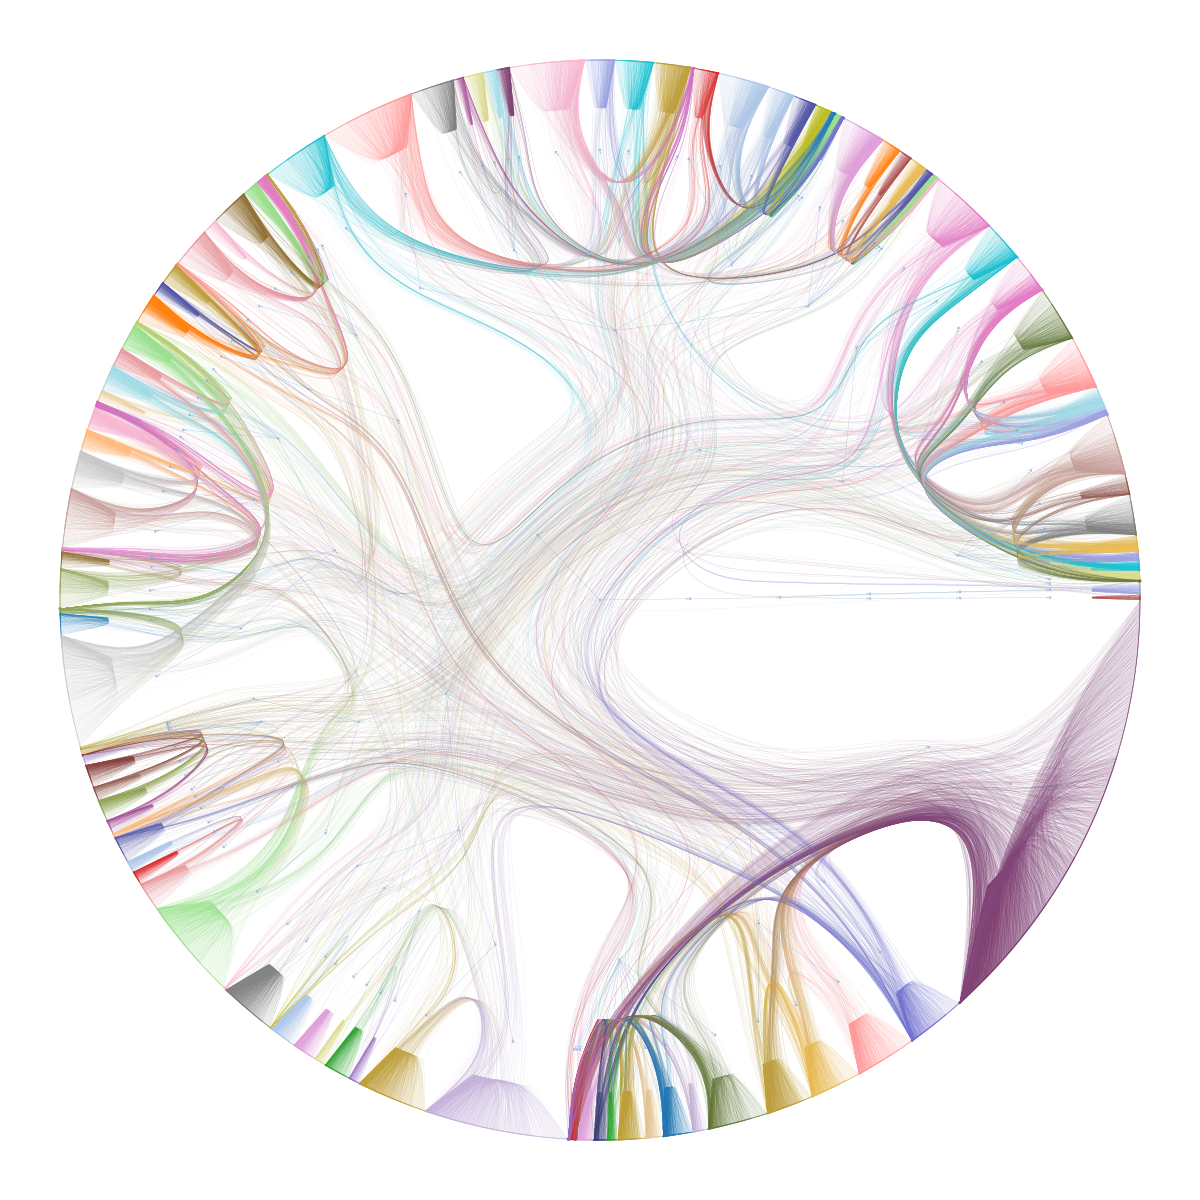

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f7e99819120, at 0x7f7e983e7760>,
 <GraphView object, directed, with 7781 vertices and 7780 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7f7e983e5540, at 0x7f7e983e7c70>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7f7e983e5540, at 0x7f7e983e6410>, False), at 0x7f7e983e5540>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f7e983e5540, at 0x7f7e983e77c0>)

In [20]:
state_hierarchy = gt.minimize_nested_blockmodel_dl(G_gt)
state_hierarchy.draw()

In [21]:
state_hierarchy.print_summary()

levels = state_hierarchy.get_levels()
for s in levels:
    print(s)
    if s.get_N() == 1:
        break

l: 0, N: 7624, B: 113
l: 1, N: 113, B: 29
l: 2, N: 29, B: 9
l: 3, N: 9, B: 3
l: 4, N: 3, B: 2
l: 5, N: 2, B: 1
l: 6, N: 1, B: 1
<BlockState object with 7624 blocks (113 nonempty), degree-corrected, for graph <Graph object, undirected, with 7624 vertices and 27806 edges, at 0x7f7e99819120>, at 0x7f7e99819060>
<BlockState object with 113 blocks (29 nonempty), for graph <Graph object, undirected, with 7624 vertices and 1525 edges, 2 internal vertex properties, 1 internal edge property, at 0x7f7e983bfca0>, at 0x7f7e983bc730>
<BlockState object with 29 blocks (9 nonempty), for graph <Graph object, undirected, with 113 vertices and 321 edges, 2 internal vertex properties, 1 internal edge property, at 0x7f7e983bf400>, at 0x7f7e983befb0>
<BlockState object with 10 blocks (3 nonempty), for graph <Graph object, undirected, with 29 vertices and 34 edges, 2 internal vertex properties, 1 internal edge property, at 0x7f7e983be8f0>, at 0x7f7e983bea10>
<BlockState object with 5 blocks (2 nonempty), fo

# **III - Epidemics simulation**

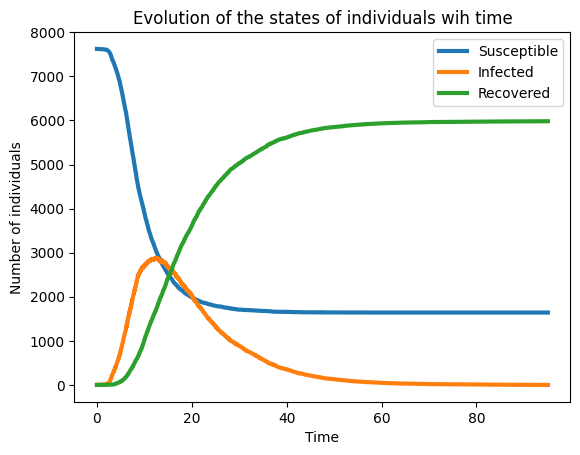

In [22]:
### SIR Model implementation

N = G.number_of_nodes()
beta = 0.1
gamma = 0.1

t,S,I,R = EoN.fast_SIR(G, beta, gamma, [random.randint(0,N-1)], tmax = 200)

def plot_SIR(t,S,I,R):
  plt.plot(t,S,label="Susceptible",linewidth=3)
  plt.plot(t,I,label="Infected",linewidth=3)
  plt.plot(t,R,label="Recovered",linewidth=3)
  plt.xlabel("Time")
  plt.ylabel("Number of individuals")
  plt.title("Evolution of the states of individuals wih time")
  plt.legend()

plot_SIR(t,S,I,R)

In [23]:
### Epidemic threshold = beta / gamma

threshold = beta / gamma
threshold

1.0

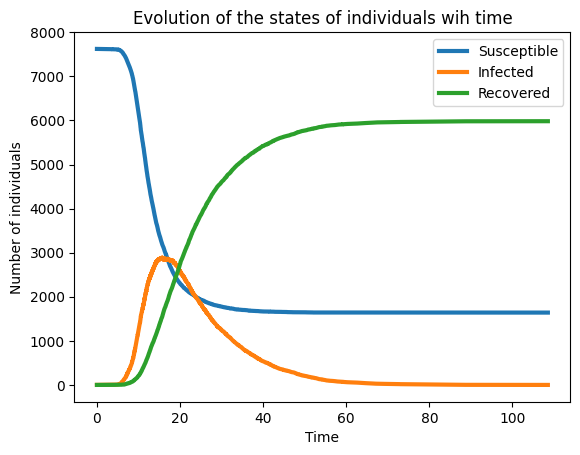

In [24]:
### Find most "central" node in the graph

closeness_values = list(closeness_list.values())
max_closeness = max(closeness_values)
most_central_node = list(filter(lambda x: closeness_values[x] == max_closeness, closeness_list))[0]

t,S,I,R = EoN.fast_SIR(G, beta, gamma, [most_central_node], tmax=200)
plot_SIR(t,S,I,R)

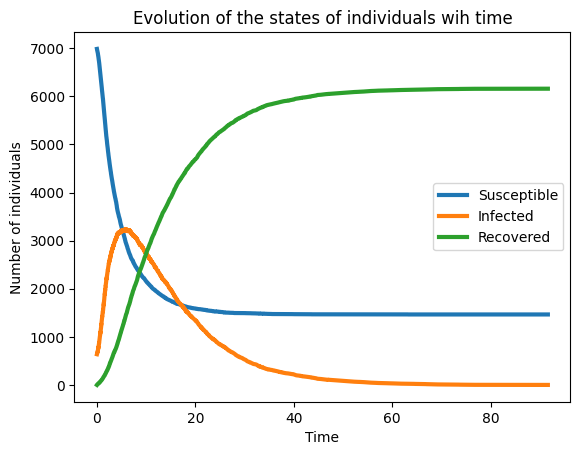

In [25]:
### Epidemics from 1 community, k nodes infected

community_indexes = [levels[1].get_blocks()[i] for i in range(G.number_of_nodes())]
initial_community = random.choice(community_indexes)

nodes_from_init_comm = [i for i, value in enumerate(community_indexes) if value == initial_community]

K = random.randint(0, len(nodes_from_init_comm))
initial_infected = random.sample(nodes_from_init_comm, K)

t,S,I,R = EoN.fast_SIR(G, beta, gamma, initial_infected, tmax=200)
plot_SIR(t,S,I,R)

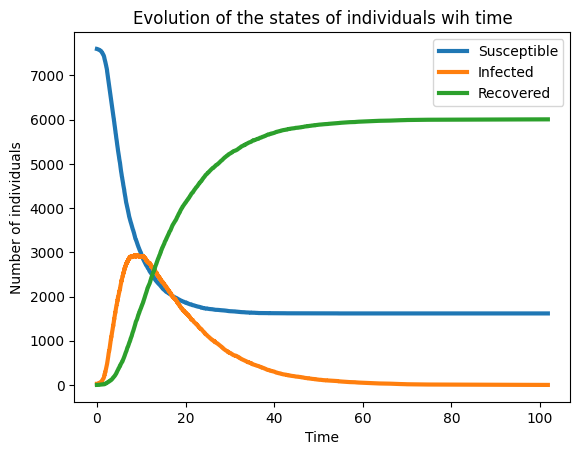

In [26]:
### Epidemics from K communities, 1 node infected in each

K_bis = random.randint(1, max(community_indexes))

random_communities = random.sample(community_indexes, K_bis)
random_communities = list(set(random_communities))
initial_nodes = []
for comm_id in random_communities:
  node_id = random.sample(nodes_from_init_comm, 1)[0]
  initial_nodes.append(node_id)

t,S,I,R = EoN.fast_SIR(G, beta, gamma, initial_nodes, tmax=200)
plot_SIR(t,S,I,R)